## IMPORT LIBRARIES

In [2]:
# Data Wrangling
import numpy as np 
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# metrics
from sklearn.metrics import confusion_matrix, classification_report

import os
import random

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

## DATASETS PATHS

In [3]:
dataset_directory = "/kaggle/input/chest-xray-pneumonia/chest_xray"

train_directory = dataset_directory+'/train/'
normal_train_dir = train_directory+'NORMAL'
pneumonia_train_dir = train_directory+'PNEUMONIA'

val_directory = dataset_directory+'/val/'
normal_val_dir = val_directory+'NORMAL'
pneumonia_val_dir = val_directory+'PNEUMONIA'

test_directory = dataset_directory+'/test/'

normal_test_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/"
pneumonia_test_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA"


## EXPLORE DATASETS

In [4]:
for dirname, _, filenames in os.walk(dataset_directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        #print(filename)

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [5]:
print(os.listdir(dataset_directory)[2:])
print(os.listdir(train_directory))
print(os.listdir(val_directory))
print(os.listdir(test_directory))

['val', 'test', 'train']
['PNEUMONIA', 'NORMAL']
['PNEUMONIA', 'NORMAL']
['PNEUMONIA', 'NORMAL']


In [6]:
for d, ds, filenames in os.walk(train_directory):
    if not filenames: continue    
    print(f"rd.choice(filenames): {random.choice(filenames)}")
    

rd.choice(filenames): person749_virus_1374.jpeg
rd.choice(filenames): NORMAL2-IM-0753-0001.jpeg


In [7]:
def img_dataset(normal_path,pneumonia_path):
    # Normal imgs
    filenames = os.listdir(normal_path)
    labels = []
    
    for filename in filenames:
        labels.append('normal')
    
    # Pneumonia imgs
    for filename in os.listdir(pneumonia_path):
        filenames.append(filename)
    
        label = filename.split('_')[1]
        if (label == 'virus') or (label == 'bacteria') :
            labels.append('pneumonia')
    
    df = pd.DataFrame({
    'filename' : filenames,
    'category' : labels})
    return df

In [8]:
train_df = img_dataset(normal_train_dir,pneumonia_train_dir)

val_df = img_dataset(normal_val_dir,pneumonia_val_dir)

In [9]:
val_df.head()

,filename,category
0,NORMAL2-IM-1431-0001.jpeg,normal
1,NORMAL2-IM-1440-0001.jpeg,normal
2,NORMAL2-IM-1442-0001.jpeg,normal
3,NORMAL2-IM-1427-0001.jpeg,normal
4,NORMAL2-IM-1430-0001.jpeg,normal


In [10]:
train_df.head()

,filename,category
0,NORMAL2-IM-0771-0001.jpeg,normal
1,NORMAL2-IM-1294-0001-0002.jpeg,normal
2,IM-0675-0001.jpeg,normal
3,NORMAL2-IM-1169-0001.jpeg,normal
4,IM-0421-0001.jpeg,normal


In [11]:
train_df['category'].value_counts(dropna= False)

pneumonia    3875
normal       1341
Name: category, dtype: int64

<AxesSubplot:xlabel='category', ylabel='count'>

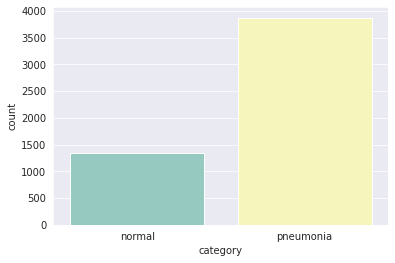

In [12]:
sns.set_style('darkgrid')
sns.countplot(train_df['category'],palette = 'Set3')

<AxesSubplot:xlabel='category', ylabel='count'>

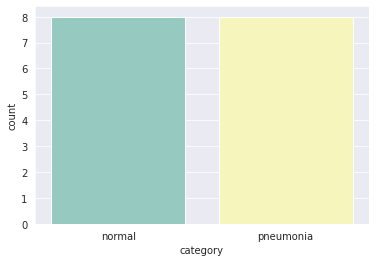

In [13]:
sns.countplot(val_df['category'],palette = 'Set3')

## IMAGE DATA GENERATOR

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

In [15]:
img_width = 224
img_height = 224
target_size = (img_width, img_height)
batch_size = 15

In [16]:
subset_classes = os.listdir(test_directory)
subset_classes

['PNEUMONIA', 'NORMAL']

In [17]:
train_datagen = ImageDataGenerator(
                                    rotation_range=20,
                                    width_shift_range=0.1,
                                    shear_range=0.1,
                                    zoom_range=0.2,
                                    samplewise_center=True,
                                    samplewise_std_normalization=True,
                                    rescale=1./255,
                                    horizontal_flip=True,
                                    brightness_range=[0.2,1.2],
                                    preprocessing_function=preprocess_input,
                                    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_directory(train_directory, 
                                            batch_size= batch_size, 
                                            shuffle=True,
                                            class_mode='binary',
                                            classes = subset_classes,
                                            subset='training',
                                            target_size=target_size
                                           )

Found 5216 images belonging to 2 classes.


In [18]:
val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_generator = val_datagen.flow_from_directory(val_directory, 
                                            batch_size = batch_size, 
                                            shuffle = True, 
                                            class_mode ='binary',
                                            classes = subset_classes,
                                            #subset='validation',
                                            target_size = target_size
                                           )


Found 16 images belonging to 2 classes.


In [19]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(test_directory, 
                                            batch_size = batch_size, 
                                            shuffle = False, 
                                            class_mode = 'binary',
                                            classes = subset_classes,
                                            target_size = target_size)

Found 624 images belonging to 2 classes.


In [20]:
def img_count(generator):
    for i in range(len (generator.class_indices)):
        print(subset_classes[i],":\t",list(generator.classes).count(i)) 

In [21]:
img_count(train_generator)

PNEUMONIA :	 3875
NORMAL :	 1341


In [22]:
img_count(test_generator) 

PNEUMONIA :	 390
NORMAL :	 234


Found 5216 images belonging to 2 classes.


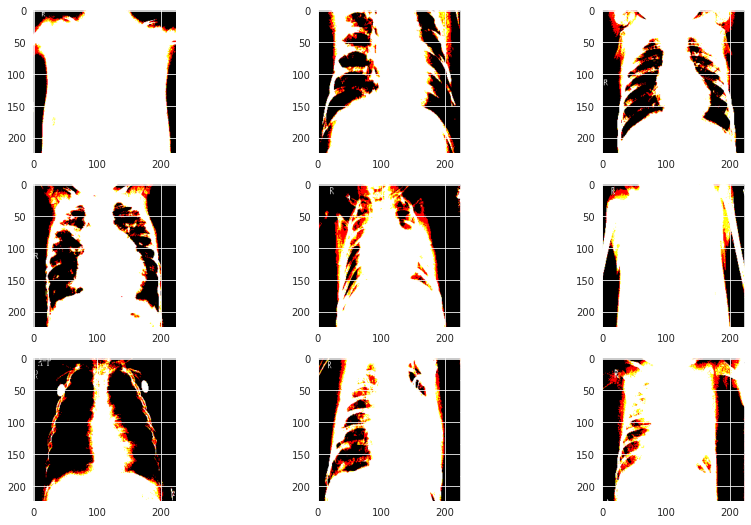

In [23]:
example_generator = val_datagen.flow_from_directory(train_directory, 
                                            batch_size= batch_size, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=target_size
                                           )

plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[1]
        plt.imshow(image, cmap= 'gray')
        break
plt.tight_layout()
plt.show()

## CALLBACKS

In [24]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [25]:
filepath = 'weights-loss-{epoch:02d}-{val_loss:.2f}.hdf5'

In [26]:
earlystop = EarlyStopping(patience=10, monitor='val_accuracy',restore_best_weights=True, min_delta=0,mode='auto')

checkpoint = ModelCheckpoint(filepath, verbose=1, monitor='val_accuracy',save_weights_only=False, 
                             save_best_only=True, mode='max')

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [27]:
callbacks = [earlystop, learning_rate_reduction,checkpoint]

## TRANSFER LEARNING -- VVG16

VGG16 is a convolutional neural network trained on a subset of the ImageNet dataset, a collection of over 14 million images belonging to 22,000 categories.

In the 2014 ImageNet Classification Challenge, VGG16 achieved a 92.7% classification accuracy. But more importantly, it has been trained on millions of images. Its pre-trained architecture can detect generic visual features as edges, colors, wheels, windshields

In [28]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications.vgg16 import VGG16, preprocess_input

### Using Pre-trained Layers for Feature Extraction

In this section, we'll demonstrate how to perform Transfer Learning without fine-tuning the pre-trained layers. Instead, we'll first use pre-trained layers to process our image dataset and extract visual features for prediction. Then we are creating a Fully-connected layer and Output layer for our image dataset. Finally, we will train these layers with backpropagation.

Pretrained convolutional layers are loaded using the Imagenet weights.
 Include_top is set to False, in order to exclude the model's fully-connected layers since imagenet has about 20 000 categories but we only got 2 classes in our dataset therefore needing only 2 neurons instead of 20 000 neurons.

In [29]:
base_vgg_model = VGG16(input_shape=(img_width,img_height,3), 
                   include_top=False, 
                   weights='imagenet')

2023-01-27 12:00:07.465430: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-27 12:00:07.570815: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-27 12:00:07.571652: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-27 12:00:07.573498: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


In [30]:
# we got Trainable params: 14,714,688 & Non-trainable params: 0, 
# therefore all layers are trainable
# by default all layers are trainable

base_vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [31]:
# freezing all layers meaning we are gonna copy the same weights of pre trained model
# the model wont be trained from scratch on our model
# the only layers that will be trained are the top layers that can be added


In [32]:
base_vgg_model.trainable = False

In [33]:
base_vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [34]:
#base_vgg_model.summary()
# we got Total params: 14,714,688,Trainable params: 0
# therefore there are Non-trainable params: 14,714,688
# as all layers are now frozen


In [35]:
 # frozen layers
for (i,layer)in enumerate(base_vgg_model.layers):
    print(f"{str(i)} {layer.__class__.__name__,layer.trainable}")

0 ('InputLayer', False)
1 ('Conv2D', False)
2 ('Conv2D', False)
3 ('MaxPooling2D', False)
4 ('Conv2D', False)
5 ('Conv2D', False)
6 ('MaxPooling2D', False)
7 ('Conv2D', False)
8 ('Conv2D', False)
9 ('Conv2D', False)
10 ('MaxPooling2D', False)
11 ('Conv2D', False)
12 ('Conv2D', False)
13 ('Conv2D', False)
14 ('MaxPooling2D', False)
15 ('Conv2D', False)
16 ('Conv2D', False)
17 ('Conv2D', False)
18 ('MaxPooling2D', False)


### creating a new fully-connected layers

In [36]:
    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.

In [37]:
from keras.models import Sequential
from keras.models import Model
from keras.layers import (Dense,Dropout, Conv2D, 
                        MaxPool2D , Flatten, BatchNormalization)

In [38]:
x = base_vgg_model.output
x = Flatten(name="flatten")(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

output_layer = Dense(2, activation='sigmoid')(x)

# Group the convolutional base and new fully-connected layers into a Model object.
vgg16_model = Model(inputs=base_vgg_model.input, outputs=output_layer)

## COMPILE MODEL

In [39]:
from tensorflow.keras.optimizers import SGD

opt = SGD(lr=0.001, momentum=0.9)

vgg16_model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = opt,
    metrics = ['accuracy'])

In [42]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## TRAINING WITHOUT FINE-TUNING

In [47]:
total_train = train_df.shape[0]
total_val = val_df.shape[0]
epochs = 10

In [50]:
vgg16_model.load_weights('/kaggle/working/weights-loss-05-6.07.hdf5')

In [51]:
vgg16_history = vgg16_model.fit(train_generator, 
    epochs = epochs,
    validation_data = val_generator,
    validation_steps = total_val // batch_size,
    steps_per_epoch = total_train // batch_size,
    callbacks = callbacks
)

Epoch 1/10
347/347 [==============================] - 136s 390ms/step - loss: 0.1261 - accuracy: 0.9540 - val_loss: 7.4872 - val_accuracy: 0.7333

Epoch 00001: val_accuracy did not improve from 0.86667
Epoch 2/10
347/347 [==============================] - 134s 387ms/step - loss: 0.1281 - accuracy: 0.9500 - val_loss: 0.3640 - val_accuracy: 0.9333

Epoch 00002: val_accuracy improved from 0.86667 to 0.93333, saving model to weights-loss-02-0.36.hdf5
Epoch 3/10
347/347 [==============================] - 134s 386ms/step - loss: 0.1205 - accuracy: 0.9529 - val_loss: 4.8800 - val_accuracy: 0.8667

Epoch 00003: val_accuracy did not improve from 0.93333
Epoch 4/10
347/347 [==============================] - 134s 387ms/step - loss: 0.1280 - accuracy: 0.9523 - val_loss: 0.6257 - val_accuracy: 0.9333

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00004: val_accuracy did not improve from 0.93333
Epoch 5/10
347/347 [==============================] - 136s 391ms

## SAVE MODEL & LAST WEIGHTS

In [52]:
vgg16_model.save('vgg16_model.h5')

## UPLOAD BEST WEIGHTS

In [53]:
vgg16_model.load_weights('/kaggle/working/weights-loss-02-0.36.hdf5')

 ## VISUALIZE TRAINING

In [54]:
print(vgg16_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


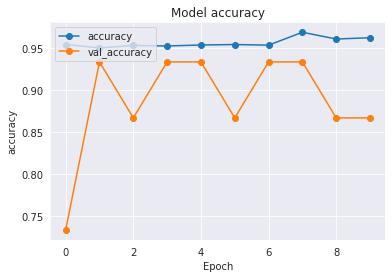

In [55]:
plt.plot(vgg16_history.history['accuracy'], marker='o')
plt.plot(vgg16_history.history['val_accuracy'], marker='o')
plt.legend(['accuracy','val_accuracy'], loc="upper left")
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.show()

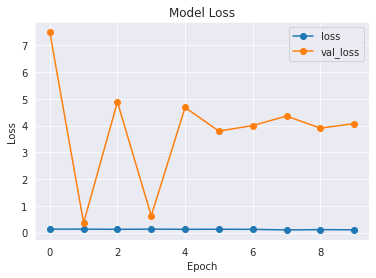

In [56]:
plt.plot(vgg16_history.history['loss'], marker='o')
plt.plot(vgg16_history.history['val_loss'], marker='o')
plt.legend(['loss','val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [57]:
def plot_training_curves(history):
    
    loss = np.array(history.history['loss'])
    val_loss = np.array(history.history['val_loss'])

    accuracy = np.array(history.history['accuracy'])
    val_accuracy = np.array(history.history['val_accuracy'])

    epochs = range(len(history.history['loss']))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Plot loss
    ax1.plot(epochs, loss, label='training_loss', marker='o')
    ax1.plot(epochs, val_loss, label='val_loss', marker='o')
    
    ax1.fill_between(epochs, loss, val_loss, where=(loss > val_loss), color='C0', alpha=0.3, interpolate=True)
    ax1.fill_between(epochs, loss, val_loss, where=(loss < val_loss), color='C1', alpha=0.3, interpolate=True)

    ax1.set_title('Loss (Lower Means Better)', fontsize=16)
    ax1.set_xlabel('Epochs', fontsize=12)
    ax1.legend()

    # Plot accuracy
    ax2.plot(epochs, accuracy, label='training_accuracy', marker='o')
    ax2.plot(epochs, val_accuracy, label='val_accuracy', marker='o')
    
    ax2.fill_between(epochs, accuracy, val_accuracy, where=(accuracy > val_accuracy), color='C0', alpha=0.3, interpolate=True)
    ax2.fill_between(epochs, accuracy, val_accuracy, where=(accuracy < val_accuracy), color='C1', alpha=0.3, interpolate=True)

    ax2.set_title('Accuracy (Higher Means Better)', fontsize=16)
    ax2.set_xlabel('Epochs', fontsize=12)
    ax2.legend();

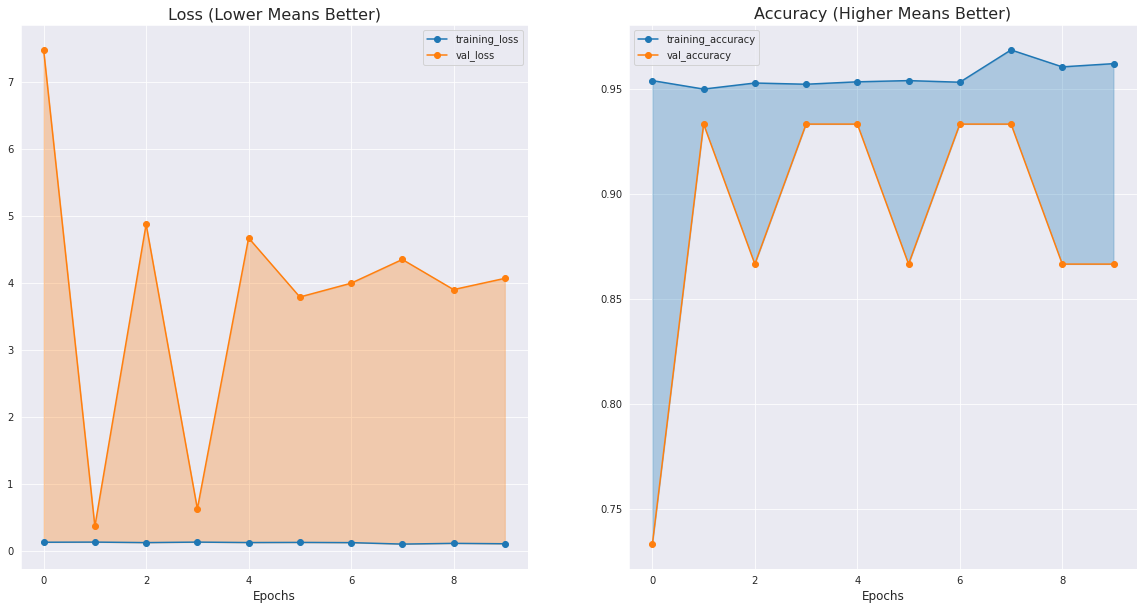

In [58]:
plot_training_curves(vgg16_history)

## EVALUATE MODEL

In [59]:
vgg16_model.evaluate(val_generator,
                     steps=len(val_generator), 
                     verbose=1)

2/2 [==============================] - 0s 265ms/step - loss: 4.6719 - accuracy: 0.8750


[4.671931743621826, 0.875]

In [60]:
 loss, acc = vgg16_model.evaluate(val_generator, steps=len(val_generator), verbose=1)
 print('Loss: %.3f' % (loss * 100.0))
 print('Accuracy: %.3f' % (acc * 100.0))

2/2 [==============================] - 0s 9ms/step - loss: 4.6719 - accuracy: 0.8750
Loss: 467.193
Accuracy: 87.500


## PREDICT

In [79]:
# Predict the probability across all classes
vgg16_predict = vgg16_model.predict(test_generator,steps= len(test_generator), verbose=0)

In [80]:
vgg16_predict

array([[1.       , 1.       ],
       [1.       , 1.       ],
       [1.       , 0.9999933],
       ...,
       [1.       , 1.       ],
       [1.       , 1.       ],
       [1.       , 1.       ]], dtype=float32)

In [81]:
vgg16_pred_classes = np.argmax(vgg16_predict, axis=-1)

In [82]:
print(len(vgg16_pred_classes))
vgg16_pred_classes


624


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### decode Predictions

In [83]:
test_labels = test_generator.class_indices
test_labels

{'PNEUMONIA': 0, 'NORMAL': 1}

In [84]:
test_labels = dict((v,k) for k,v in test_labels.items())

In [85]:
print(test_labels)

{0: 'PNEUMONIA', 1: 'NORMAL'}


In [86]:
vgg16_predicted_lables = [test_labels[k] for k in vgg16_pred_classes]
print(vgg16_predicted_lables)
len(vgg16_predicted_lables)

['PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', '

624

In [87]:
test_actual_lables = [test_labels[k] for k in test_generator.classes]
print(test_actual_lables)
len(test_actual_lables)

['PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA'

624

## ACCURACY

In [88]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [89]:
vgg16_acc = accuracy_score(test_actual_lables, vgg16_predicted_lables)
print("VGG16 Model Accuracy without Fine-Tuning: {:.2f}%".format(vgg16_acc * 100))

VGG16 Model Accuracy without Fine-Tuning: 76.92%


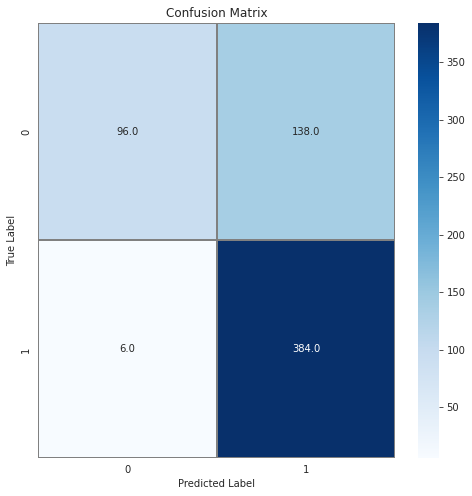

In [90]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(test_actual_lables, vgg16_predicted_lables) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

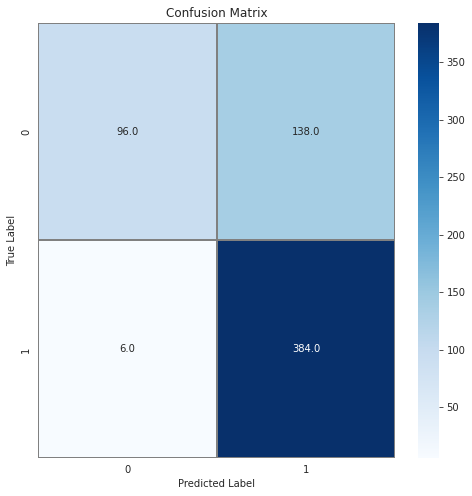

In [91]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(test_actual_lables, vgg16_predicted_lables) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

<Figure size 720x720 with 0 Axes>

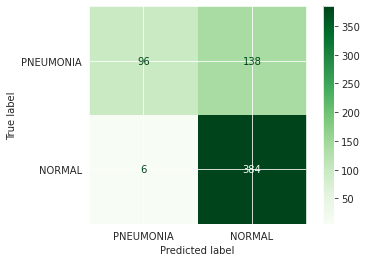

In [92]:
cm = confusion_matrix(test_actual_lables, vgg16_predicted_lables)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= subset_classes)

plt.figure(figsize=(10, 10));
disp.plot(cmap=plt.cm.Greens);

In [93]:
print(classification_report(test_actual_lables, vgg16_predicted_lables))


              precision    recall  f1-score   support

      NORMAL       0.94      0.41      0.57       234
   PNEUMONIA       0.74      0.98      0.84       390

    accuracy                           0.77       624
   macro avg       0.84      0.70      0.71       624
weighted avg       0.81      0.77      0.74       624



In [94]:
recall_score( test_actual_lables, vgg16_predicted_lables,average='weighted')

0.7692307692307693

In [95]:
precision_score( test_actual_lables, vgg16_predicted_lables,average='weighted') 

0.8127112914131169